In [197]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [198]:
import requests 
import pandas as pd
from bs4 import BeautifulSoup
import time
import json
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
#read in data from web and turn into html5 doc
url = 'https://theboardr.com/international_skateboarding/USA/United_States'
r = requests.get(url, verify=False)
soup = BeautifulSoup(r.content,"html5lib")
skaters = []
#found object in dom to scrape
def clean_text():   
    for a in soup.find_all("div", {"class":"MuiGrid-root MuiGrid-container MuiGrid-spacing-xs-1"}):
        return skaters.append(a.text.split(":"))
def split_it(col):
    return re.sub(r'[Overall',' ',col)
def split_it_rank(col):
    return re.findall(r'^Rank\d{1,2}',col)  
def split_it_age(col):
    return re.findall(r"Age\d\d",col) 
def split_it_points(col):
    return re.findall(r"Points\d\d.\d{1,5}",col)

def split_it_earnings_2(col):
    pattern = "13th|14th"
    col =  re.findall(r"\$.+",col)
    return col

def split_it_earnings_8(col):
    return  re.sub(r"\d{1,2}th|nd|rd","",col)
    
def remove_characters(col):
    return re.sub(r"[a-zA-Z]",'',col)
# Function to convert   
def listToString(s):  
    str1 = "" 
    return (str1.join(s)) 


C:\Users\SSAVAGE\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
#show raw dat

In [199]:
#Bring in Raw Data and clean it with host of tecniques(regex/formating/etc)
df = clean_text()
df = pd.DataFrame(skaters).transpose()
df.columns = ['Skater_Name']
df = df['Skater_Name'].str.split(' ', expand=True)
df.columns = ['None','First Name','Last Name','Rank', 'Age']
df = df.dropna()
df['Country'] = df['Last Name'].str[-3:].astype('str')
df['Last Name'] = df['Last Name'].str[:-3].astype('str')
df['Age_True'] = df['Age'].apply(lambda x:split_it_age(x)).astype('str')
df['Age_True'] = df['Age_True'].apply(lambda x:remove_characters(x))
df['Points'] = df['Age'].apply(lambda x:split_it_points(x)).astype('str')
df['Points'] = df['Points'].apply(lambda x:remove_characters(x))
df['Overall Rank'] = df['Age'].apply(lambda x:split_it_rank(x)).astype('str')
df['Overall Rank'] = df['Overall Rank'].apply(lambda x:remove_characters(x))

df['Earnings_Test'] = df['Age'].apply(lambda x: split_it_earnings_2(x))
df['Earnings_Test_2'] = df['Age'].apply(lambda x: split_it_earnings_8(x))
df['Earnings'] = df['Earnings_Test_2'].apply(lambda x: split_it_earnings_2(x))
df['Earnings'] = df['Earnings'].apply(lambda x: listToString(x))


df['USA Rank'] = df['Rank'].str.replace("Overall|Rank|th|nd|rd|st","")
df.drop(columns=['None','Rank','Country','Age',"Earnings_Test_2","Earnings_Test"],inplace=True)
df.columns
c= "Rank1stAge26Points65,590Earnings$1,010,0002nd"

df['Points'] = df['Points'].str.strip("[]|'|,")
df['Age_True'] = df['Age_True'].str.strip("[]|'")
df['Overall Rank'] = df['Overall Rank'].str.strip("[]|'")
df.replace(',','', regex=True, inplace=True)
df.fillna(0, inplace =True)
df['Points'] = df['Points'].astype('float')
df['Age_True'] = df['Age_True'].astype('float')
df['Earnings'] = df['Earnings'].str.strip("$")
df['Earnings'] = df['Earnings'].astype('float')
#print clean data frame with data in colomun fassion 
print(df)
#show basic stats of numeric output 
df.describe()

   First Name  Last Name  Age_True   Points Overall Rank    Earnings USA Rank
1       Nyjah     Huston      26.0  65590.0            1  10100002.0        1
2        Alex   Sorgente      23.0  47841.0            3   3375503.0        2
3         Tom     Schaar      21.0  36760.0            6     31780.0        3
4        Cory     Juneau      21.0  34115.0            7     29000.0        4
5      Jagger      Eaton      20.0  31410.0            8     15450.0        5
6        Jake     Ilardi      24.0  28005.0           10     13952.0        6
7      Jordyn    Barratt      22.0  27345.0           12     19452.0        7
8     Dashawn     Jordan      24.0  25875.0           14     14045.0        8
9     Tristan     Rennie      22.0  25320.0           15    160500.0        9
10   Brighton     Zeuner      16.0  24950.0           16    205575.0       10
11      Louie      Lopez      26.0  21525.0           23    127200.0       11
12      Chris    Russell      24.0  21405.0           24    1394

,Age_True,Points,Earnings
count,20.000000,20.000000,2.000000e+01
mean,23.200000,26882.900000,7.483504e+05
std,2.764436,12044.901262,2.321642e+06
min,16.000000,16640.000000,4.000000e+03
25%,22.000000,18955.000000,2.661300e+04
50%,23.500000,23237.500000,7.542500e+04
75%,25.000000,28856.250000,1.669125e+05
max,29.000000,65590.000000,1.010000e+07


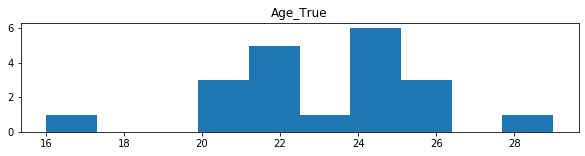

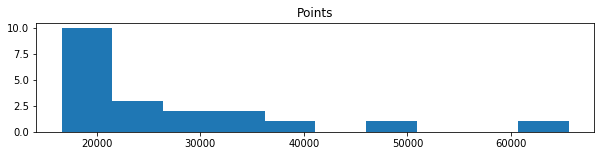

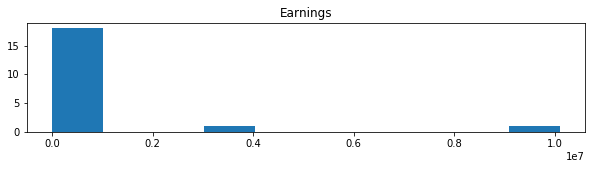

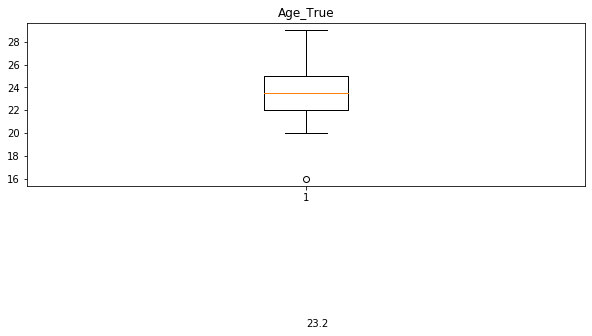

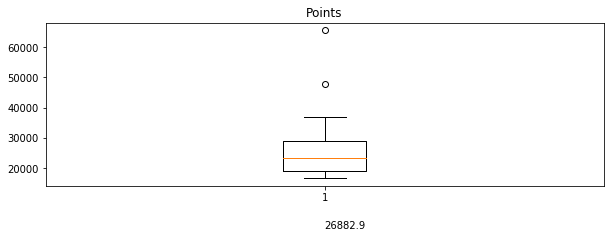

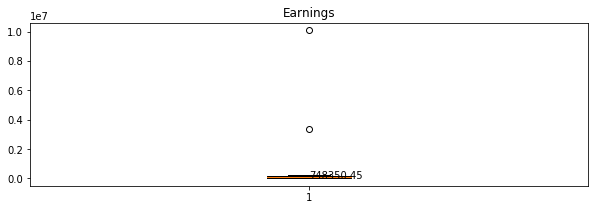

In [200]:
#EDA
#Take all columns that are numeric and plot them in a histogram for further analytics
numeric_features = [i for i in df.columns if df[i].dtype != 'object']
for i in df[numeric_features].columns:
        plt.figure(figsize = (10,2))
        plt.hist(df[i])
        plt.title(i)

#Take all columns that are numeric and plot them in boxplots and plot means

for i in df[numeric_features].columns:
        plt.figure(figsize = (10,3))
        plt.boxplot(df[i])
        plt.title(i)
        plt.text(1, 3,df[i].mean())

In [180]:
df.corr()
#it looks like Points is  85%  correlated to  Earnings 

,Age_True,Points,Earnings
Age_True,1.000000,-0.068993,0.220942
Points,-0.068993,1.000000,0.854729
Earnings,0.220942,0.854729,1.000000


In [181]:
#Simple Linear Regression to prove this theory out


# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Earnings ~ Points', data=df).fit()

# Inspect the results
print(results.summary())

#It appears that 73% of the variation in Earnings for the top 25 skateboarders is dependent on Points Ee

                            OLS Regression Results                            
Dep. Variable:               Earnings   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     48.81
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.60e-06
Time:                        15:25:23   Log-Likelihood:                -307.91
No. Observations:                  20   AIC:                             619.8
Df Residuals:                      18   BIC:                             621.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.681e+06   6.92e+05     -5.320      0.0